In [2]:
import numpy as np
import matplotlib
from matplotlib.pyplot import imshow
from matplotlib import pyplot as plt
from matplotlib.image import imread

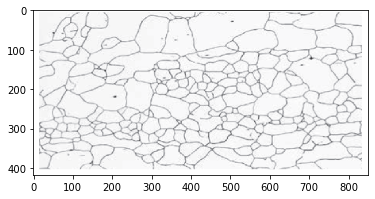

In [3]:
img = imread('GRAIN.png')
plt.imshow(img)
plt.show()

In [4]:
np.shape(img)

(418, 850, 3)

In [5]:
dark=np.zeros(np.shape(img)[1])

In [6]:
dark = [np.sum(img[100][i]) for i in range(np.shape(img)[1])]

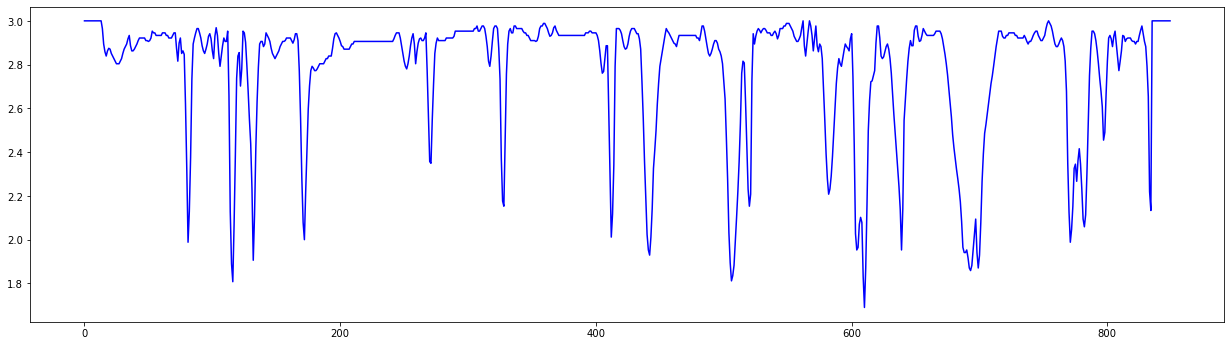

<Figure size 1540.8x417.6 with 0 Axes>

In [8]:
plt.plot(dark,'b')
plt.figure()
matplotlib.rcParams["figure.figsize"] = [21.4, 5.8]
plt.show()

In [12]:
400/len(dark)

0.47058823529411764

In [8]:
def countpeaks(ARR,TH=2.5):
    PEAK = np.zeros(np.shape(ARR))
    for i in range(len(ARR)):
        if (ARR[i] < ARR[i-1]) and (ARR[i] < ARR[i+1]):
                   PEAK[i] = ARR[i]
    return len(PEAK[(PEAK < TH)&(PEAK !=0)])    

In [9]:
def FIND_GRAIN_SIZE(FILE,NO_LINES=5,TH=2.5,MAG=100):
    
    IMG = imread(FILE)
    LINES = np.arange(0,np.shape(IMG)[0],(np.shape(IMG)[0]//NO_LINES))
    LINES = LINES[LINES !=0]
    
    print("THE Y-coordinate of lines are:  ", LINES)
    plt.figure()
    matplotlib.rcParams["figure.figsize"] = [15.4, 15.8]
    plt.imshow(IMG)
    
    LINE = np.zeros(np.shape(IMG)[1])
    peaks = np.zeros(NO_LINES+10)
    
    for line in LINES:
        plt.plot(np.zeros(np.shape(IMG)[1])+line,'black',linewidth=0.6)
        for i in range(len(LINE)):
            LINE[i] = np.sum(IMG[line][i][:])
        peaks[np.where(LINES==line)]=countpeaks(LINE,TH)
    print("THE number of intersections are:",peaks)
    plt.show()
    
    print("We cannot count the last line because it lies outside the figure")
    print("No. of parallel lines is: ", NO_LINES-1)
    len_of_a_line = 0.2645833333*np.shape(IMG)[1]
    print("Length of a line is : ", len_of_a_line,"mm. As 1px = 0.2645833333mm")
    length_of_all_lines = len_of_a_line*(NO_LINES-1)
    print("Length of all lines is : ", length_of_all_lines,"mm")
    total_intersections = np.sum(peaks)
    print("Total no. of intersections is: ",total_intersections)
    mean_len = length_of_all_lines/(total_intersections*MAG)
    print("Mean intercept length is: ",mean_len)
    print("GRAIN SIZE IS:",(mean_len*3/2))
    plt.close
    

THE Y-coordinate of lines are:   [104 208 312 416]
THE number of intersections are: [23. 27. 31.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


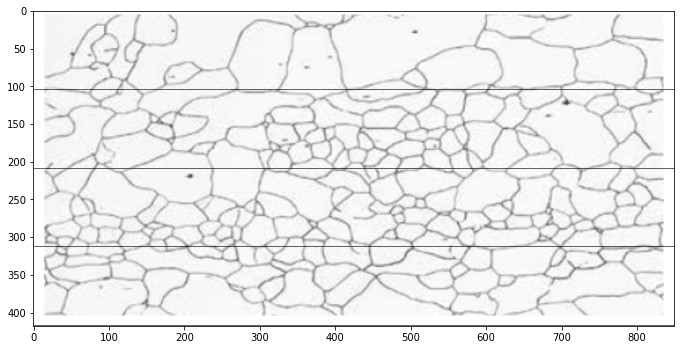

We cannot count the last line because it lies outside the figure
No. of parallel lines is:  3
Length of a line is :  224.895833305 mm. As 1px = 0.2645833333mm
Length of all lines is :  674.687499915 mm
Total no. of intersections is:  81.0
Mean intercept length is:  0.08329475307592593
GRAIN SIZE IS: 0.1249421296138889


In [10]:
FIND_GRAIN_SIZE("GRAIN.png",4,2.5,100)